In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import seawater as sw

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})
rcParams.update({'font.size': 18})

In [61]:
# load grid and diversity data

indir = '../../comparison/data/HRgrid/'

#import grid params for CR grid

in_file = '%s/HFacC.data' % indir
HF = np.fromfile(in_file, dtype = '>f')
HF = HF.reshape(50, 510, 3060)[0,:,:]

in_file = '%s/XG.data' % indir
XC = np.fromfile(in_file, dtype = '>f')
XC = XC.reshape(510, 3060)

in_file = '%s/YG.data' % indir
YC = np.fromfile(in_file, dtype = '>f')
YC = YC.reshape(510, 3060)

# load diversity data

in_file = r'/Volumes/My Passport/high_res/DIVER4/DIVER4.1999.data'
div = np.fromfile(in_file, dtype = '>f')
div = div.reshape(510, 3060)

div = ma.masked_where(HF == 0, div, copy=False)


Text(0,0.5,u'Latitude')

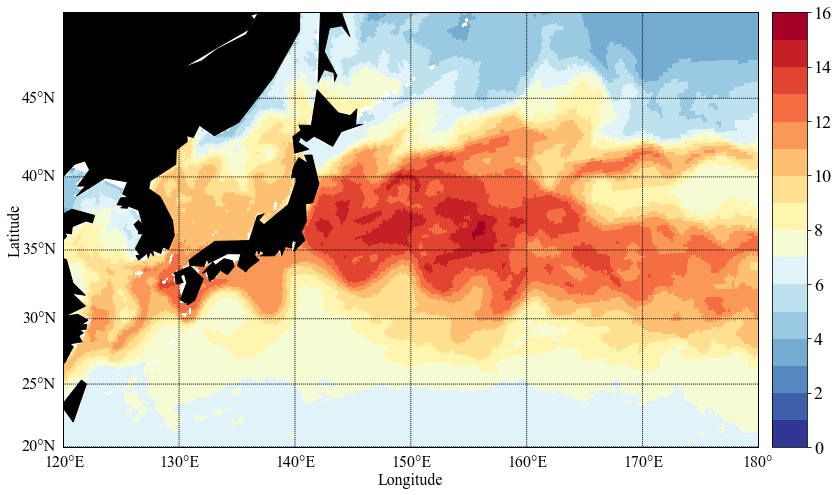

In [66]:
from MITgcmutils.cs import pcol

fig0, ax1 = plt.subplots(1, figsize=(12,8), dpi = 300)

m = Basemap(projection='merc',llcrnrlat=20.,urcrnrlat=50.,\
            llcrnrlon=120.,urcrnrlon=180.,lat_ts=0,resolution='c', ax = ax1)

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='k',lake_color='white')

palette = plt.get_cmap('RdYlBu_r', 16)
palette.set_bad('w',1.0)

pcol(XC, YC, div, projection=m, vmin=0., vmax=16., cmap = palette)

m.colorbar()

m.drawparallels(np.arange(-50,80,5),labels=[1,0,0,0], fontsize=16)
m.drawmeridians(np.arange(-180,180,10),labels=[0,0,0,1], fontsize=16)

plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=16)
plt.xlabel('Longitude', fontsize =16, labelpad = 25)
plt.ylabel('Latitude', fontsize =16, labelpad = 40)
